# II. Comprensión de datos

## Recolección de los datos iniciales

La recolección de los datos iniciales se realiza directamente desde la terminal. Para ello es necesario realizar los siguientes pasos: 

1. Asegurarse de que se tiene una versión de python 3 o superior. De no ser así, actualizar python (por ejemplo, se pueden seguir las instrucciones en https://docs.python-guide.org/starting/install3/osx/). 

2. Acceder a su cuenta de Kaggle. De no tener una, es necesario registrarse en https://www.kaggle.com/. 

3. Una vez que se accedió a la cuenta, ingresar a la sección **"My Account"**

<img src="img/fig_kaggle1.png" alt="Drawing" style="width: 200px;"/>

4. Obtener un token en formato .json en la sección **API** seleccionando el botón **"Create New API Token"**. Guardar este token en la carpeta de **"Downloads"** del directorio raíz. 


<img src="img/fig_kaggle2.png" alt="Drawing" style="width: 500px;"/>

4. Correr el archivo **DescargaDatos.sh** en la terminal. Este archivo:

    1. Installa la API de Kaggle. 
    
    2. Crea el directorio **.kaggle** en la raíz. 
    
    3. Transfiere el token a la carpeta del paso anterior. 
    
    4. Crea la carpeta **Proyecto_Final** en dentro del directorio **Documents**. 
    
    5. Crea las carpetas **Datos**, **Datos_trad** y **Datos_clean** dentro del directorio del proyecto final. 
    
    6. Descarga los datos de la competencia *Predict Future Sales* en la carpeta **Datos**.  
    
    7. Descomprime los archivos con extensión **.gz**


## Descripción de los datos

Se obtuvieron datos históricos de las ventas diarias de la compañía "1C Company" (en adelante 1C únicamente). A continuación se describe cada uno de los sets de datos. 

1. **items.csv**. Contiene información suplementaria sobre los artículos de vendidos por 1C. Este archivo contiene 22,170 observaciones para 3 variables. Las variables que incluye son: 

    1. *item_name*: nombre del artículo (en ruso). 
    
    2. *item_id*: identificador único del artículo. 
    
    3. *item_category_id*: identificador único de la categoría a la que pertenece el artículo.
    
    
2. **item_categories.csv**. Contiene información suplementaria sobre las categorías de los artículos vendidos por 1C. Este archivo contiene 84 observaciones  para 2 variables. Las variables que incluye son: 

    1. *item_category_name*: nombre de la categoría (en ruso). 
    
    2. *item_cateogry_id*: identificador único de la categoría.
    
3. **shops.csv**. Contiene información suplementaria sobre las tiendas de 1C. Este archivo contiene 60 observaciones para 2 variables. Las variables que incluye son: 

    1. *shop_name*: nombre de la tienda (en ruso).
    
    2. *shop_id*: identificador único de las tiendas de 1C. 
    

4. **sales_train.csv**. Contiene los datos de entrenamiento para el proyecto. Este archivo contiene 1,048,575 de observaciones para 6 variables. Las variables que incluye son: 

    1. *date*: fecha en que se registró la compra/devolución en el formato dd/mm/yyyy. 
    
    2. *date_block_num*: número consecutivo para el mes de venta. Es decir, enero 2013 es igual a 0, febrero 2013 es igual a 1, ..., octubre 2015 es igual a 33. 
    
    3. *shop_id*: identificador único de las tiendas de 1C en que se vendió/devolvió el artículo.
    
    4. *item_id*: identificador único del artículo de 1C que se vendió/devolvió. 
    
    5. *item_price*: precio en el que se vendió el artículo. No se menciona la moneda en que realizó la transacción, posiblemente fueron dólares o rublos rusos. 
    
    6. *item_cnt_day*: número de unidades vendidas del artículo. Números negativos indican una devolución del artículo. Se va a predecir una cantidad mensual de esta medida. 
    
    
5. **test.csv**. Contiene los datos de las tiendas y artículos para los cuales se tiene que predecir las ventas mensuales. Este archivo contiene 214,200 observaciones para 3 variables. Las variables que incluye son: 

    1. *ID*: identificador único para la dupla (tienda,artículo). 
    
    2. *shop_id*: identificador único de la tienda. 
    
    3. *item_id*: identificador único del artículo. 


6. **sample_submission_csv**. Contiene la muestra de la forma en que se deben ingresar las predicciones en el concurso. Contiene 214,200 observaciones para 2 variables. Las variables que incluye son: 

    1. *ID*: identificador único para la dupla (tienda,artículo). 
    
    2. *item_cnt_month*: predicción mensual del artículo en la tienda representada por ID. 

## Exploración de los datos

Para poder realizar una exploración de los datos, primero es necesario convertir los campos en ruso a un idioma que podamos entender. Elegimos la traducción al inglés para tratar de ganar la mayor precisión posible. Cabe destacar que esto es parte del proceso de limpieza de datos; sin embargo, para tener la capacidad de interpretar el análisis exploratorio, consideramos importante realizar la traducción en este paso.  

### Traducción del ruso al inglés

Para la traducción de los catálogos del ruso al inglés se utilizó la librería translateR de R y la API de Google Translate. Los datos traducidos se almacenaron en el objeto **transdata.RData**. Dentro de este objeto se encuentran los siguientes data_frames: 

1. **item_category_ru**: corresponde al archivo **item_category.csv** original. Es decir, con el nombre de las categorías sólo en ruso. 

2. **item_category_en**: corresponde al archivo **item_category.csv** con los nombres de las categorías tanto en ruso como en inglés. 

3. **item_category**: corresponde al archivo **item_category.csv** con los nombres de las categorías únicamente en inglés.

4. **items_ru**: corresponde al archivo **items.csv** original. Es decir, con el nombre de los artículos sólo en ruso. 

5. **items_en**: corresponde al archivo **items.csv** con los nombres de los artículos tanto en ruso como en inglés. 

6. **items**: corresponde al archivo **items.csv** con los nombres de los artículos únicamente en inglés.

7. **shops_ru**: corresponde al archivo **shops.csv** original. Es decir, con el nombre de las tiendas sólo en ruso. 

8. **shops_en**: corresponde al archivo **shops.csv** con los nombres de las tiendas tanto en ruso como en inglés. 

9. **shops**: corresponde al archivo **shops.csv** con los nombres de las tiendas únicamente en inglés.


El proceso para la traducción de los catálogos se puede encontrar en el archivo **Traduccion.Rmd**. Cabe destacar que para poder utilizar la API de Google Translate es necesario generar una llave y esto puede ocasionar costos, por lo que se decide no incluir la llave en el archivo. Si desea realizar la traducción para nuevos datos, es necesario reemplazar el caracter *"Please_use_your_own_API_key"* del archivo **Traduccion.Rmd** por una llave válida de Google Translate.

Para generar una llave de la API de Google Translate, se requieren los siguientes pasos: 

1. Ingresar a la liga https://console.cloud.google.com/

2. Generar un proyecto de la barra de arriba.
 
<img src="img/fig_google1.png" alt="Drawing" style="width: 500px;"/>

<img src="img/fig_google2.png" alt="Drawing" style="width: 500px;"/>

<img src="img/fig_google3.png" alt="Drawing" style="width: 500px;"/>

3. Posteriormente, ir al menú "hamburguesa" en la parte superior izquierda y seleccionar "Servicios & API".

<img src="img/fig_google4.png" alt="Drawing" style="width: 500px;"/>

4. Del dashboard de la plataforma, hacer la búsqueda de "Google Translate API" y habilitarla.

5. Del menú de la izquierda seleccionar "credenciales" > Generar credenciales > API Key.

6. Copiar la llave del API generada para usar en el código en el archivo **Traducción.Rmd**.

### Cargar catálogos y datos entrenamiento

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Cargamos los datos de entrenamiento. Estos no contienen campos en ruso. 
train = pd.read_csv("datos/sales_train.csv")
# Cargamos los catálogos de tiendas, categoría de productos y nombre de productos
shops = pd.read_csv("datos_trad/shops_en.csv")
item_categories = pd.read_csv("datos_trad/item_category_en.csv")
item_name = pd.read_csv("datos_trad/items_en.csv")

#### Catálogo de artículos y categorías

El catálogo de artículos y de categorías se pueden juntar. Se hace un left join de éstos y se almacena en el data_frame datos_items.

**Catálogo de categorías de productos**

En las primeras 5 observaciones vemos que las categrías fueron bien traducidas.

In [2]:
item_categories.head()

,item_category_name,item_category_id,translatedContent
0,PC - Гарнитуры/Наушники,0,PC - Headsets / Headphones
1,Аксессуары - PS2,1,Accessories - PS2
2,Аксессуары - PS3,2,Accessories - PS3
3,Аксессуары - PS4,3,Accessories - PS4
4,Аксессуары - PSP,4,Accessories - PSP


In [3]:
print("Existen ",len(item_categories), " categorías de productos.")

Existen  84  categorías de productos.


Limpiamos el nombre de los encabezados.

In [4]:
item_categories.columns = ['item_category_name_ru', 'item_category_id', 'item_category_name_en']

**Catálogo de productos**

En las primeras 5 observaciones se aprecia que la traducción es suficientemente buena para el análisis exploratorio.

In [5]:
item_name.head()

,item_name,item_id,item_category_id,translatedContent
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,! IN POWER OF OVERVIEW (PLASTIC) D
1,!ABBYY FineReader 12 Professional Edition Full...,1,76,! ABBYY FineReader 12 Professional Edition Ful...
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,*** IN THE BEAMS OF GLORY (UNV) D
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,*** BLUE WAVE (Univ) D
4,***КОРОБКА (СТЕКЛО) D,4,40,*** THE BOX (GLASS) D


In [6]:
print("Existen ",len(item_name), " productos que vende la empresa 1C.")

Existen  22170  productos que vende la empresa 1C.


In [7]:
item_name.columns = ['item_name_ru', 'item_id','item_category_id', 'item_name_en']

**Join de los catálogos de categoría de productos y nombre de productos**

Se hace un left join:

catálogo de nombre de productos <- catálogo de categoría de productos

In [8]:
# Hacemos un inner join por item_category_id
catalogos = item_name.join(item_categories,on=['item_category_id'], how='inner',rsuffix='_quitar')
# Seleccionamos los campos en inglés y sus ids respectivos
columnas_catalogo = ['item_category_id','item_category_name_en','item_id','item_name_en']
# Subset de las columnas que nos interesan
catalogos_en = catalogos.loc[:,columnas_catalogo]
# Limpiamos los nombres
catalogos_en.columns = ['item_category_id', 'category_name', 'item_id', 'item_name']
# Mostramos las primeras 6 observaciones
catalogos_en.head()

,item_category_id,category_name,item_id,item_name
0,40,Cinema - DVD,0,! IN POWER OF OVERVIEW (PLASTIC) D
2,40,Cinema - DVD,2,*** IN THE BEAMS OF GLORY (UNV) D
3,40,Cinema - DVD,3,*** BLUE WAVE (Univ) D
4,40,Cinema - DVD,4,*** THE BOX (GLASS) D
5,40,Cinema - DVD,5,*** NEW AMERICAN COUNTERS (UNI) D


#### Catalogo de tiendas

En las primeras 5 observaciones vemos que la traducción no fue tan buena, pero aún así permite tener un entendimiento de las ubicaciones de las tiendas.

In [9]:
shops.head()

,shop_name,shop_id,translatedContent
0,"!Якутск Орджоникидзе, 56 фран",0,"! Yakutsk Ordzhonikidze, 56 fran"
1,"!Якутск ТЦ ""Центральный"" фран",1,! Yakutsk Shopping Center &quot;Central&quot; ...
2,"Адыгея ТЦ ""Мега""",2,Adygea shopping center &quot;Mega&quot;
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Balashikha October &quot;Kinomir&quot;
4,"Волжский ТЦ ""Волга Молл""",4,Volzhsky shopping center &quot;Volga Mall&quot;


In [10]:
shops_en = shops.loc[:,['shop_id','translatedContent']]
shops_en.columns = ['shop_id','shop_name']
shops_en.head()

,shop_id,shop_name
0,0,"! Yakutsk Ordzhonikidze, 56 fran"
1,1,! Yakutsk Shopping Center &quot;Central&quot; ...
2,2,Adygea shopping center &quot;Mega&quot;
3,3,Balashikha October &quot;Kinomir&quot;
4,4,Volzhsky shopping center &quot;Volga Mall&quot;


In [11]:
print("Existen ",len(shops), " tiendas de la empresa 1C en Rusia.")

Existen  60  tiendas de la empresa 1C en Rusia.


#### Datos de entrenamiento

**Joins de catálogos traducidos al conjunto de entrenamiento:**

Vemos que no hay problemas en la importación del conjunto de entrenamiento.

In [12]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [13]:
print("El dataset de entrenamiento contiene ",len(train), " observaciones de entrenamiento.")

El dataset de entrenamiento contiene  2935849  observaciones de entrenamiento.


Hacemos un join para ponerle al conjunto de entrenamiento el nombre de los productos, categorías y tiendas.

In [14]:
# Hacemos un join con el catálogo de productos
train_en = train.join(catalogos_en, on=['item_id'], how='left',rsuffix='_quitar')
# Hacemos un join con el catálogo de tiendas
train_en = train_en.join(shops_en, on =['shop_id'], rsuffix='_quitar')
# Seleccionamos las variables que nos interesan
variables_de_interes = ['date','date_block_num','shop_id','shop_name','item_category_id','category_name','item_id','item_name','item_price','item_cnt_day']
# Hacemos un subset de las variables que nos interesan
train_en = train_en.loc[:,variables_de_interes]
# Mostramos las primeras 6 observaciones
train_en.head()

,date,date_block_num,shop_id,shop_name,item_category_id,category_name,item_id,item_name,item_price,item_cnt_day
0,02.01.2013,0,59,Yaroslavl shopping center &quot;Altair&quot;,37,Cinema - Blu-ray,22154,Scene 2012 (BD),999.00,1.0
1,03.01.2013,0,25,Moscow TRK &quot;Atrium&quot;,58,Music - Vinyl,2552,DEEP PURPLE The House Of Blue Light LP,899.00,1.0
2,05.01.2013,0,25,Moscow TRK &quot;Atrium&quot;,58,Music - Vinyl,2552,DEEP PURPLE The House Of Blue Light LP,899.00,-1.0
3,06.01.2013,0,25,Moscow TRK &quot;Atrium&quot;,58,Music - Vinyl,2554,DEEP PURPLE Who Do You Think We Are LP,1709.05,1.0
4,15.01.2013,0,25,Moscow TRK &quot;Atrium&quot;,56,Music - CD production,2555,DEEP PURPLE 30 Very Best Of 2CD (Firm.),1099.00,1.0


**Limpieza del data types:**

En el conjunto de entrenamiento traducido al inglés tiene casi 3 millones de observaciones y 10 variables con los siguientes tipos de datos:

In [15]:
train_en.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 10 columns):
date                2935849 non-null object
date_block_num      2935849 non-null int64
shop_id             2935849 non-null int64
shop_name           2935849 non-null object
item_category_id    2935849 non-null int64
category_name       2935849 non-null object
item_id             2935849 non-null int64
item_name           2935849 non-null object
item_price          2935849 non-null float64
item_cnt_day        2935849 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 224.0+ MB


Se tienen tres tipos de datos flotantes, enteros y objetos.

* date: No se reconoce como fecha. Hay que modificar el tipo de dato

* date_block_num: número entero

* shop_id: número entero

* shop_name: No se reconoce como un string

* item_category_id: número entero

* item_category_name: No se reconoce como un string

* item_id: Se reconoce como entero

* item_name: No se reconoce como un string

* item_price: se reconoce como un flotante

* item_cnt_day: se reconoce como un flotante

Es importante destacar que no se registran valores nulos.

El pandas dataframe pesa 224 MB en memoria.

A continuación arreglamos la columna de date, para que se reconozca como una fecha.

In [16]:
# Utilizamos expresiones regulares
import re
# Primero convertimos la columna data a un string
date_string = train_en['date'].astype('str')
# Utilizamos un list comprehension para aplicar la función de sustitución de una expresión regular de . por ""
data_string_clean = [re.sub("\.","",date_str) for date_str in date_string]
# Aplicamos la función de pandas to_date_time especificando el formato de la fecha.
train_en['date'] = pd.to_datetime(data_string_clean, format='%d%m%Y')
train_en['ano'] = [fecha[4:9] for fecha in data_string_clean]
train_en['mes'] = [fecha[2:4] for fecha in data_string_clean]

In [17]:
train_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 12 columns):
date                datetime64[ns]
date_block_num      int64
shop_id             int64
shop_name           object
item_category_id    int64
category_name       object
item_id             int64
item_name           object
item_price          float64
item_cnt_day        float64
ano                 object
mes                 object
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 268.8+ MB


La fecha ahora está en formato datetime.

Cambiamos las strings y los ids a valores numéricos.

In [18]:
train_en['date_block_num'] = train_en['date_block_num'].astype('category') 
train_en['date_block_num'] = train_en['date_block_num'].astype('category') 
train_en['shop_id'] = train_en['shop_id'].astype('category') 
train_en['shop_name'] = train_en['shop_name'].astype('category') 
train_en['item_category_id'] = train_en['item_category_id'].astype('category')
train_en['category_name'] = train_en['category_name'].astype('category')
train_en['item_id'] = train_en['item_id'].astype('category')
train_en['item_name'] = train_en['item_name'].astype('category')
train_en['ano'] = train_en['ano'].astype('category')
train_en['mes'] = train_en['mes'].astype('category')
train_en.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 12 columns):
date                2935849 non-null datetime64[ns]
date_block_num      2935849 non-null category
shop_id             2935849 non-null category
shop_name           2935849 non-null category
item_category_id    2935849 non-null category
category_name       2935849 non-null category
item_id             2935849 non-null category
item_name           2935849 non-null category
item_price          2935849 non-null float64
item_cnt_day        2935849 non-null float64
ano                 2935849 non-null category
mes                 2935849 non-null category
dtypes: category(9), datetime64[ns](1), float64(2)
memory usage: 99.6 MB


¡Con los cambios a los tipos de variables el dataframe pesa ahora 94 MB en memoria!

## Almacenamiento de los datos

Guardamos los datos limpios en el directorio **Datos_clean**.

In [19]:
#train_en.to_csv("Datos_clean/train_mensuales_completo_python.csv", index=False)

## Análisis Exploratorio de Datos

En esta sección se presenta un análisis exploratorio de los datos disponibles. Las distribuciones para varias de las variables están muy concentradas cerca de un sólo valor o contienen gran cantidad de datos atípicos por lo que los boxplot no son una buena representación gráfica. Es por ello, que la mayoría de las variables se analizan con histogramas, violin plots o con series de tiempo.

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
train_exploratory = train_en.copy()

### Variables auxiliares

*Categorías generales por artículo:*

Dado el gran número de categorías por producto, se va a construir una variable categórica más general. Aprovechamos la estrucutra de los datos para agrupar la información en conjuntos más simples.

In [21]:
# Función para limpiar el texto de la categoría
def limpiar_categoria(texto):
    pattern = re.compile(".+?(?=-)")
    if bool(pattern.match(texto)):
        texto = re.findall(pattern, texto)[0]
        texto_limpio = texto.strip()
        return texto_limpio
    else:       
        return texto

In [22]:
# Limiampos el texto de la categoría y lo agregamos a la base de datos exploratoria.
train_exploratory['general_category'] = [limpiar_categoria(categoria) for categoria in train_exploratory.category_name]
train_exploratory['general_category'] = train_exploratory['general_category'].astype('category')

*Ingreso por artículos vendidos:*

Aprovechando que tenemos los precios y las cantidades sería razonable calcular el ingreso y utilizarlo para explorar los datos y tener un mejor entendimiento del problema de la empresa.

In [23]:
# Calculamos el ingreso por observación multiplicando el precio por la cantidad.
train_exploratory['income'] = train_exploratory.item_price * train_exploratory.item_cnt_day

### Análisis Univariado

**¿Cómo se comportan las distribuciones de las principales variables categóricas y continuas del conjunto de datos?**


#### Fecha diaria (date)

* **Hallazgo:** Existen 34 meses en el conjunto de entrenamiento. El mes que más aparece es diciembre de 2013 y 2014 con 143,246 y 130,786 observaciones respectivamente.

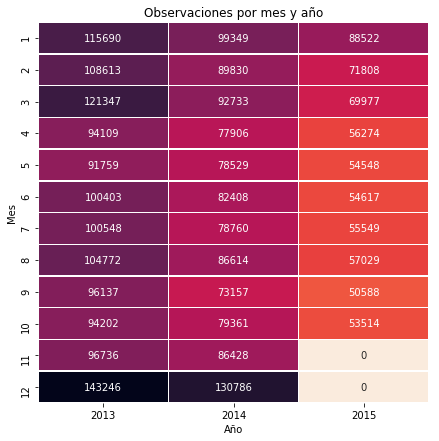

In [24]:
# Construimos indicadoras
train_exploratory = train_exploratory.set_index('date')
month = train_exploratory.index.month
year = train_exploratory.index.year
# Graficamos un mapa de calor de la tabla cruzada mes y año
plt.figure(figsize = (7, 7))
sns.heatmap(train_exploratory.pivot_table(index=month, columns=year, values='item_cnt_day', aggfunc='count', fill_value=0)
, annot=True, fmt="d", linewidths=.5, cmap=sns.cm.rocket_r, cbar=False)
plt.title("Observaciones por mes y año")
plt.xlabel("Año")
plt.ylabel("Mes")
plt.show()
train_exploratory = train_exploratory.reset_index()

#### Mes (date_block_num)

* **Hallazgo:** El código de predicción para el mes comienza en cero para enero de 2013 y termina en octubre de 2015 con el código 33. Por lo que la predicción tendra como código el 34 para el mes de noviembre de 2015.

El indicador de mes es una variable categórica.

In [25]:
train_exploratory['date_block_num'].describe()

count     2935849
unique         34
top            11
freq       143246
Name: date_block_num, dtype: int64

Existen 34 meses. El primero de enero de 2013 comienza en 0, y el último valor es octubre de 2015 con el valor de 33.

In [26]:
print(set(train_exploratory['date_block_num']))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}


#### Tiendas (shop)

* **Hallazgo**: Son seis tiendas en las que se concentran el mayor número de transacciones. (Moscow TC, Moscow Shopping Center, Moscow TRK, Khimki Shopping Center, Yakutsk Shopping Center, San Petesburgo) 

El nombre de las tiendas esta largo y sucio. Se construye una función para limpiarlo.

In [27]:
# Limpiar tienda
def limpiar_tienda(texto):
    #pattern1 = "[^;|\&]*"
    return texto[0:10]

In [28]:
train_exploratory['shop_name'] = [limpiar_tienda(tienda) for tienda in train_exploratory['shop_name']]
train_exploratory['shop_name'] = train_exploratory['shop_name'].astype("category")

In [29]:
shop_freq = train_exploratory.groupby('shop_name')['shop_name'].count()

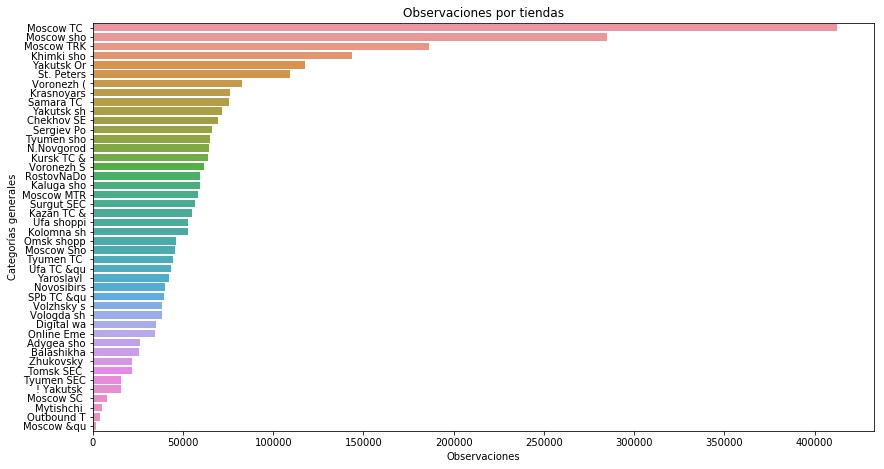

In [30]:
plt.figure(figsize = (14, 7.5))
sns.countplot(data=train_exploratory, y='shop_name', order = train_exploratory['shop_name'].value_counts().index)
plt.title("Observaciones por tiendas")
plt.ylabel("Categorías generales")
plt.xlabel("Observaciones")
plt.show()

Las tiendas con más registros en la base de datos son:

* Moscow TC, 
* Moscow Shopping Center
* Moscow TRK
* Khimki Shopping Center
* Yakutsk Shopping Center
* San Petesburgo

#### Categorías (category_name)

* **Hallazgo**: Los productos con mayores transacciones están en las categorías de cinema, viedojuegos, música y regalos.

En la sección anterior se construyó la variable categoría general para resumir las 84 categorías de productos.

In [31]:
train_exploratory.head()

,date,date_block_num,shop_id,shop_name,item_category_id,category_name,item_id,item_name,item_price,item_cnt_day,ano,mes,general_category,income
0,2013-01-02,0,59,Yaroslavl,37,Cinema - Blu-ray,22154,Scene 2012 (BD),999.00,1.0,2013,01,Cinema,999.00
1,2013-01-03,0,25,Moscow TRK,58,Music - Vinyl,2552,DEEP PURPLE The House Of Blue Light LP,899.00,1.0,2013,01,Music,899.00
2,2013-01-05,0,25,Moscow TRK,58,Music - Vinyl,2552,DEEP PURPLE The House Of Blue Light LP,899.00,-1.0,2013,01,Music,-899.00
3,2013-01-06,0,25,Moscow TRK,58,Music - Vinyl,2554,DEEP PURPLE Who Do You Think We Are LP,1709.05,1.0,2013,01,Music,1709.05
4,2013-01-15,0,25,Moscow TRK,56,Music - CD production,2555,DEEP PURPLE 30 Very Best Of 2CD (Firm.),1099.00,1.0,2013,01,Music,1099.00


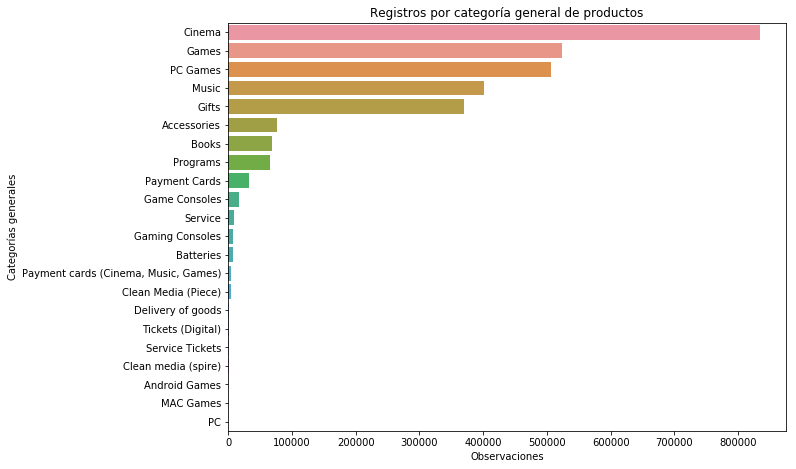

In [32]:
item_cat_freq = train_exploratory.groupby('general_category')['general_category'].count()
plt.figure(figsize = (10, 7.5))
sns.countplot(data=train_exploratory, y='general_category', order = train_exploratory['general_category'].value_counts().index)
plt.title("Registros por categoría general de productos")
plt.ylabel("Categorías generales")
plt.xlabel("Observaciones")
plt.show()

Vemos que las observaciones que tenemos de ventas diarias se concentran en las siguientes categorías generales de productos:
    
* Cinema
* Games
* PC games
* Music
* Gifts

Estos cateogrías registran más de 400,000 entradas cada una.

#### Artículos (item)

* **Hallazgo:** La categoría nombre se puede limpiar para extraer una categoría más general.

A continuación se muestran solo un desglose las subcategorías de las cinco categorías generales con más observaciones.

In [33]:
#item_freq = train_exploratory.groupby('category_name')['category_name'].count()
item_freq = train_exploratory.groupby(['general_category','category_name'])['category_name'].count()

In [34]:
item_freq.head()

general_category  category_name       
Accessories       Accessories - PS2           2
                  Accessories - PS3       18461
                  Accessories - PS4       25283
                  Accessories - PSP        2304
                  Accessories - PSVita     7231
Name: category_name, dtype: int64

Vemos que la variable category name tiene el nombre de la categoría genérica a la derecha y luego una sub categoría después del guión. Podemos explotar esta estructura, para extraer la categoría más genérica para utilizarla para segmentar de manera más sintética la ventas de la empresa.

#### Precios (Item_price)

**Hallazgos:**

* Hay solamente un precio negativo en la base de datos, pero no representa una afectación.

* El precio más extremo correspone al precio de una venta mayorista.

* Ninguno de los precios des distribuye con una forma gaussiana por las siguientes razones: hay subpoblaciones de prdocutos dentro de las categorías, hay huecos en el espacio continuo de los precios de algunos productos por su naturaleza. Por ejemplo, las tarjetas prepagadas, tienen tres modas porque solo hay tres tipos de tarjetas: 500, 1000 y 1500.

* Las distribuciones con un rango amplio de precios son: accesorios, cinema, delivery goods, games, gifts, musica, pc games y programs.

La variable de precios por artículo se distribuye de la siguiente manera:

In [35]:
train_exploratory['item_price'].describe()

count    2.935849e+06
mean     8.908532e+02
std      1.729800e+03
min     -1.000000e+00
25%      2.490000e+02
50%      3.990000e+02
75%      9.990000e+02
max      3.079800e+05
Name: item_price, dtype: float64

Existen precios negativos en la base de datos, los cuales provienen de devoluciones. El precio máximo es de 307,980.

In [36]:
# Cálculo del rango inter cuartílico
rango_int_q = train_exploratory['item_price'].quantile(.75) - train_exploratory['item_price'].quantile(.25)
print("El rango inter cuartílico de los precios es de :", rango_int_q)

El rango inter cuartílico de los precios es de : 750.0


Es claro que existen outliers dentro de la muestra. Sin embargo también los precios corresponden a diferentes productos que van desde una televisión hasta una postal. Por lo que sería conveniente segmentar por categorías esta variable y revisar la distribución de los precios.

Revisamos los precios extremos para verificar si se tratan de outliers:

In [37]:
# Precios negativos
precios_negativos = train_exploratory['item_price'] < 0
train_exploratory.loc[precios_negativos,:]

,date,date_block_num,shop_id,shop_name,item_category_id,category_name,item_id,item_name,item_price,item_cnt_day,ano,mes,general_category,income
484683,2013-05-15,4,32,Moscow SC,19,Games - PS3,2973,"DmC Devil May Cry [PS3, Russian subtitles]",-1.0,1.0,2013,05,Games,-1.0


In [38]:
# Precios muy altos
precios_grandes = train_exploratory['item_price'] > 100000
train_exploratory.loc[precios_grandes,:]

,date,date_block_num,shop_id,shop_name,item_category_id,category_name,item_id,item_name,item_price,item_cnt_day,ano,mes,general_category,income
1163158,2013-12-13,11,12,Online Eme,75,Programs - Home and Office,6066,Radmin 3 - 522 persons.,307980.0,1.0,2013,12,Programs,307980.0


In [39]:
# Checamos productos que contengan en el item_name Radmin
productos_radmin = train_exploratory['item_name'].str.contains("Radmin")
train_exploratory.loc[productos_radmin,:].head()

,date,date_block_num,shop_id,shop_name,item_category_id,category_name,item_id,item_name,item_price,item_cnt_day,ano,mes,general_category,income
291238,2013-03-21,2,22,Moscow Sho,75,Programs - Home and Office,6065,Radmin 3 - 1 persons.,1299.0,1.0,2013,03,Programs,1299.0
291260,2013-03-22,2,22,Moscow Sho,75,Programs - Home and Office,6065,Radmin 3 - 1 persons.,1299.0,1.0,2013,03,Programs,1299.0
318708,2013-03-11,2,25,Moscow TRK,75,Programs - Home and Office,6065,Radmin 3 - 1 persons.,1299.0,1.0,2013,03,Programs,1299.0
370177,2013-04-18,3,12,Online Eme,75,Programs - Home and Office,6065,Radmin 3 - 1 persons.,1299.0,1.0,2013,04,Programs,1299.0
375067,2013-04-06,3,6,Voronezh (,75,Programs - Home and Office,6065,Radmin 3 - 1 persons.,1299.0,1.0,2013,04,Programs,1299.0


* Solamente hay un precio negativo, que corresponde a un juego de play station.

* Solamente hay un precio mayor a 100,000 que corresponde a una venta. El concepto es un programa de software para casa u oficina. El nombre del producto es Radmin 3 para 522 personas. 

* A pesar de que el precio es un valor extremo, hace sentido. La licencia para una persona cuesta 1299 y por 522 personas debería valer 678 mil. El valor que tenemos es de 307.9 mil. En todo caso lo que esta mal es el valor de ventas, ya que solo registra una venta, pero en realidad serían 522 para ese producto.

A continuación se grafican las distribuciones de los precios, segmentadas por categoría general.

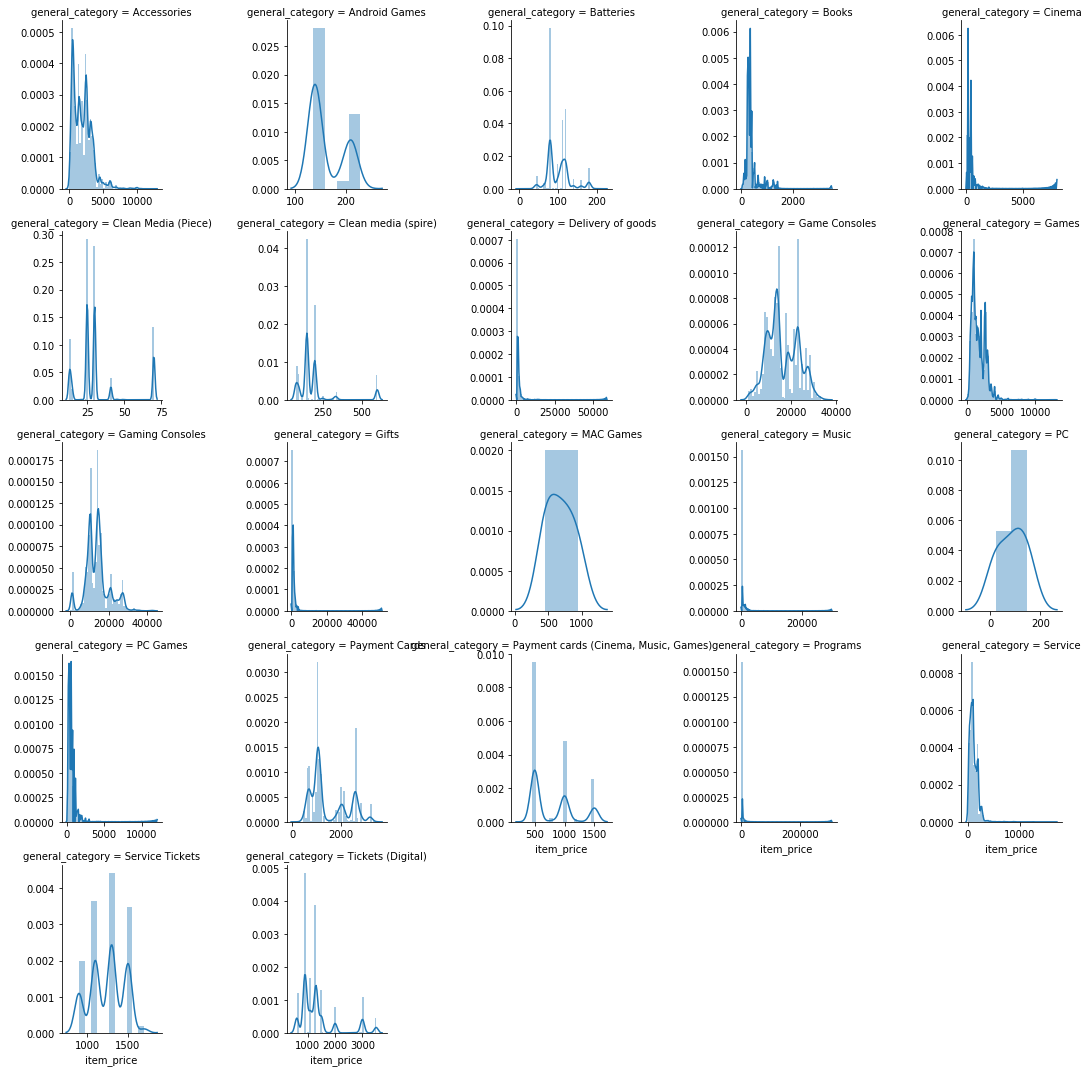

In [40]:
g = sns.FacetGrid(train_exploratory, col='general_category',col_wrap=5, sharex=False, sharey=False)
g.map(sns.distplot, 'item_price')
plt.show()

* Ninguno de los precios des distribuye con una forma gaussiana. Esto no debería sorprender ya que hacia dentro de cada cateogría existen otras subcategorías de productos. 

* Por otro lado, hay muchos huecos entre el rango de precios  de los productos. Por ejemplo, las tarjetas prepagadas, tienen tres modas porque solo hay tres tipos de tarjetas: 500, 1000 y 1500.

* Las distribuciones con un rango amplio de precios son: accesorios, cinema, delivery goods, games, gifts, musica, pc games y programs.

####  Ventas (Item_cnt_day)

* **Hallazgo:** Las distribuciones de las ventas tienen algunos valores extremos, que están bien registrados. El número de ventas mayores a 25 unidades son 2,300 observaciones de casi 3 millones.

A continuación se muestran unos violin plots para comprender como se distirubyen los datos de las ventas por categoría y cómo se encuentran concentrados los datos alrededor de la distribución.

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


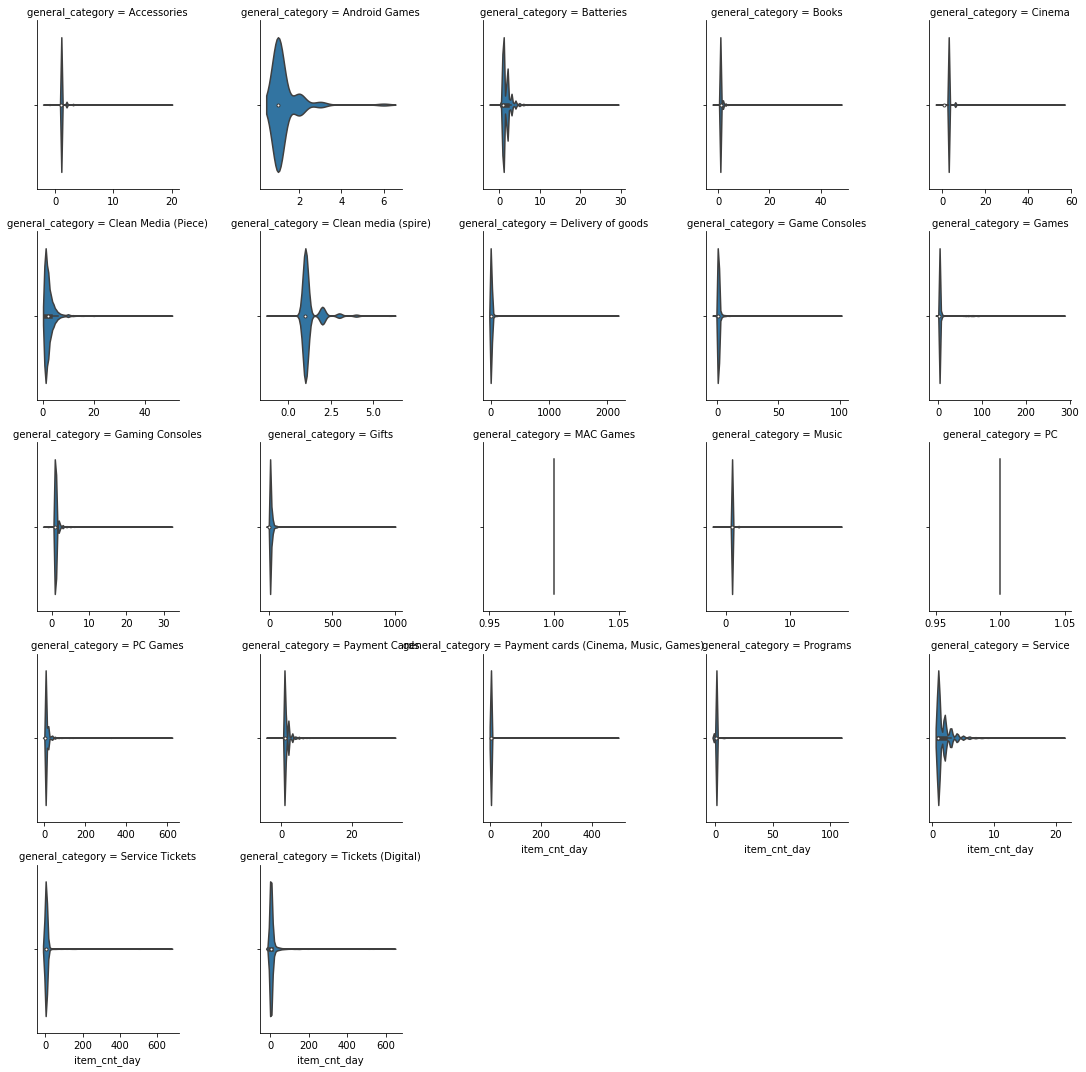

In [41]:
g = sns.FacetGrid(train_exploratory, col='general_category',col_wrap=5, sharex=False, sharey=False)
g.map(sns.violinplot, 'item_cnt_day')
plt.show()

Considerando que las observaciones que tenemos son ventas diarias por productos y tiendas podemos esperar que las distribuciones estén sesgadas a la derecha, es decir concentradas en ventas unitarias chicas, como se muestra en las gráficas de arriba.

Llama la atención los rangos de ventas de las siguientes categorías:

* Delivery goods
* PC Games
* Payment cards
* Service tickets
* TIckets (digital)

A continuación se invetigan cuáles son los productos con ventas superiores a las 100 unidades.

In [42]:
# Función para extraer el número de ventas con valores extremos
def calcular_observaciones_con_ventas_atipicas(ventas_threshold):
    obs = train_exploratory.loc[train_exploratory['item_cnt_day'] > ventas_threshold, :]
    print("Hay {} observaciones con ventas superiores a {} unidades".format(len(obs),ventas_threshold))
    #print(set(obs.item_name))
    print()
    
ventas_threshold = [25,50,100,200,300,400,500,1000]
[calcular_observaciones_con_ventas_atipicas(threshold) for threshold in ventas_threshold]

Hay 2300 observaciones con ventas superiores a 25 unidades

Hay 523 observaciones con ventas superiores a 50 unidades

Hay 138 observaciones con ventas superiores a 100 unidades

Hay 38 observaciones con ventas superiores a 200 unidades

Hay 23 observaciones con ventas superiores a 300 unidades

Hay 19 observaciones con ventas superiores a 400 unidades

Hay 12 observaciones con ventas superiores a 500 unidades

Hay 1 observaciones con ventas superiores a 1000 unidades



[None, None, None, None, None, None, None, None]

Podemos ver que la la mayoría de las ventas son menores a 25 unidades. Aquellas que resultan atípicas tienen muy pocas observaciones. Por ejemplo, de casi tres millones de observaciones sólo 2,300 están por arriba de las 25 unidades.

## Análisis Bivariado

### Ingreso y ventas mensuales

**Hallazgos:**

* En la gráfica podemos ver que el ingreso (azul) y las ventas (verde) mensuales tienen un componente estacional. 
* En diciembre es cuando venden más por las celebraciones navideñas y de año nuevo.
* Las ventas tienen una tendencia negativa en general. No obtante el ingreso de la empresa no muestra un comportamiento similar.

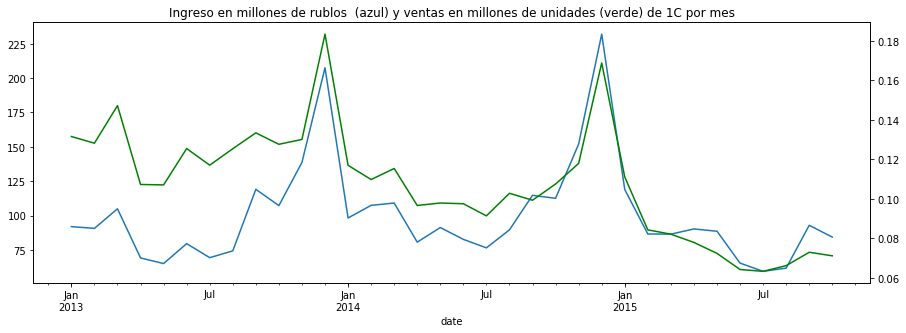

In [43]:
# Agregar de manera mensual las series de ventas e ingreso
train_exploratory = train_exploratory.reset_index()
train_exploratory = train_exploratory.set_index("date")
train_exploratory_mensual = train_exploratory.resample('M').sum() / 1000000

# Primera gráfica del ingreso mensual
train_exploratory_mensual.income.plot(figsize = (15, 4.8),
                                      title = "Ingreso en millones de rublos  (azul) y ventas en millones de unidades (verde) de 1C por mes",
                                      label = "Ingreso en 10 mil millones de rublos")
# Seguda gráfica de las ventas mensuales
train_exploratory_mensual.item_cnt_day.plot(secondary_y=True,style='g',
                                           label = "Ventas en unidades")
plt.show()

### Ingreso y ventas cuatrimestrales

**Hallazgos:**

* A nivel cuatrimestre las ventas muestran una clara tendencia a la baja. Sin embargo, las ventas se han mantenido relativamente constantes. 
* 2014 fue mejor año en ventas que 2013. No hay información completa para comparar con 2015.

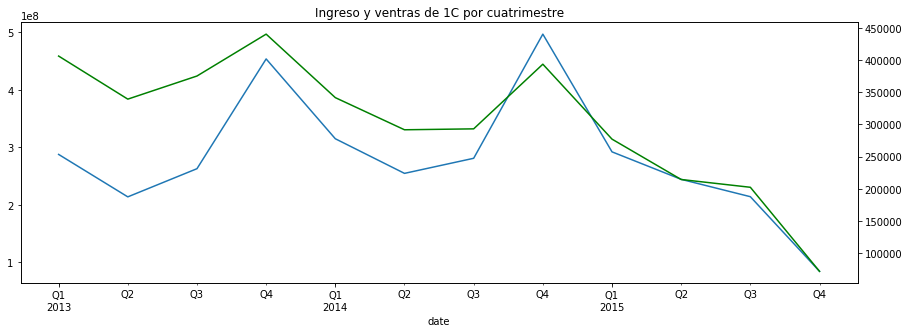

In [44]:
# Agregar las series de ventas e ingreso a nivel cuatrimestre
train_exploratory = train_exploratory.reset_index()
train_exploratory = train_exploratory.set_index("date")
train_exploratory_cuatrimestral = train_exploratory.resample('Q').sum()
# Primera gráfica ingreso
# Primera gráfica del ingreso cuatrimestral
train_exploratory_cuatrimestral.income.plot(figsize = (15, 4.8),
                                      title = "Ingreso y ventras de 1C por cuatrimestre",
                                      label = "Ingreso en 10 mil millones de rublos")
# Seguda gráfica de las ventas cuatrimestral
train_exploratory_cuatrimestral.item_cnt_day.plot(secondary_y=True,style='g',
                                           label = "Ventas en unidades")
plt.show()

### Ingreso por tiendas

**Hallazgos:**

* Las tiendas que generan **mayores ingresos son Moscow TC y Moscow shopping center** (> 100M).

* **Parecería** que las ventas de las tiendas han tenido una **mala racha en 2015**, pero hace falta la información de noviembre y diciembre.

* **Sorprende el crecimiento de la tienda Digital Wa**, pues muestra una tendencia creciente y homogénea..

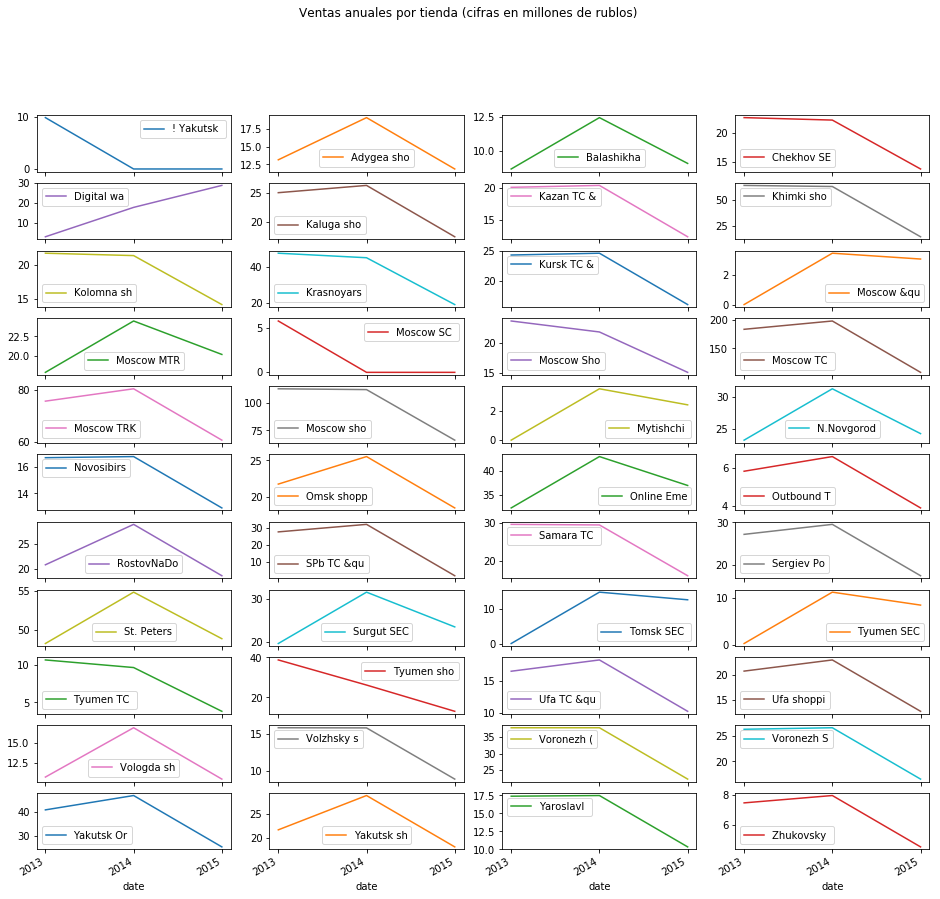

In [45]:
# Construimos una tabla dinámica de tienda e ingreso
ingreso_tienda = train_exploratory.pivot_table(index='date',columns='shop_name', values='income',aggfunc='sum')
# Agregamos el ingreso de cada tienda de manera anual
ingreso_tienda_anuales = ingreso_tienda.resample('Y').sum()
# Ponemos el ingreso en millones de rublos
ingreso_tienda_anuales_miles = ingreso_tienda_anuales / 1000000
# Generamos una grid de gráficas por tienda
ingreso_tienda_anuales_miles.plot(figsize=(16,15),subplots=True, layout=(11,4),
                                  title="Ventas anuales por tienda (cifras en millones de rublos)")
plt.show()

### Ingreso por categoría de productos

**Hallazgos:**

* **Ingresos crecientes en:** android games, batteries, books, MAC games, service tickets.
* **Ingresos cayendo en:** cinema, music, pc games. 
* Sorprende que los productos que generan más ingreso a la compañia vienen **cayendo** de manera sostenida. En parte hace sentido que la gente compra estos productos o los consume a través de tiendas online, como es el caso de las películas la música y los videojuegos..

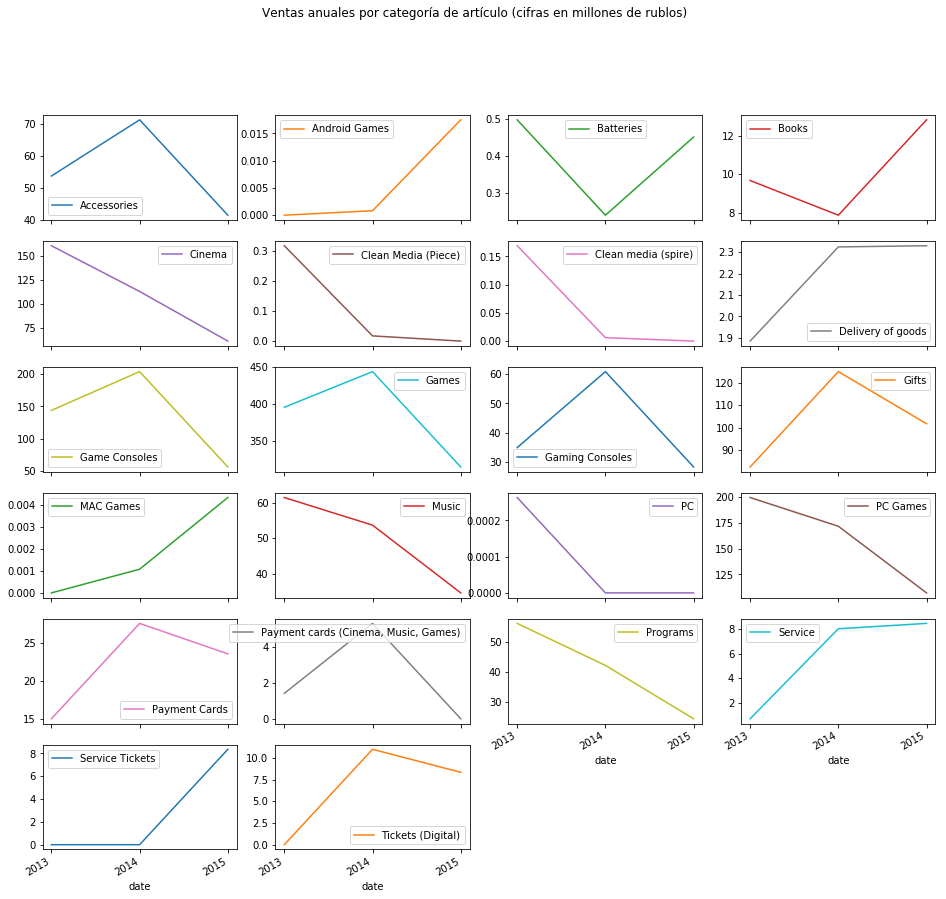

In [46]:
# Construimos una tabla dinámica de tienda e ingreso
ingreso_articulo = train_exploratory.pivot_table(index='date',columns='general_category', values='income',aggfunc='sum')
# Agregamos el ingreso de cada tienda de manera anual
ingreso_artucilos_anuales = ingreso_articulo.resample('Y').sum()
# Ponemos el ingreso en millones de rublos
ingreso_articulos_anuales_millones = ingreso_artucilos_anuales / 1000000
# Generamos una grid de gráficas por tienda
ingreso_articulos_anuales_millones.plot(figsize=(16,15),subplots=True, layout=(6,4),
                                  title="Ventas anuales por categoría de artículo (cifras en millones de rublos)")
plt.show()

### Ingreso de la categoría de productos más vendida por tienda (top1)

* **Hallazgos:** La categoría de productos más vendida por tienda son los video juegos. Solo hay dos tiendas que venden más regalos.

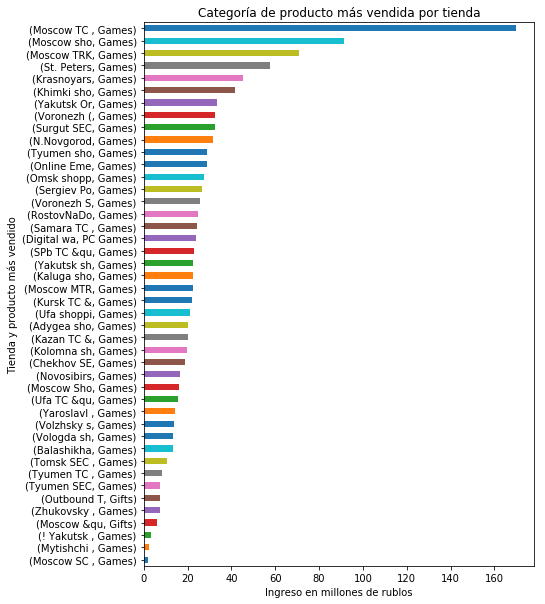

In [47]:
# Agrupamos la base por tienda y categoría de producto.
train_exploratory_por_tienda_producto = train_exploratory.groupby(['shop_name','general_category']).sum()
# Dividimos el ingreso en millones 
train_exploratory_por_tienda_producto['income_millones'] = train_exploratory_por_tienda_producto['income'] / 1000000
# Agrupamos por tienda
ingreso_por_tienda_producto = train_exploratory_por_tienda_producto['income_millones'].groupby(level=0,group_keys=False)
# Graficamos categoría más vendida por tienda
ingreso_por_tienda_producto.nlargest(1).sort_values(ascending = True).plot(kind="barh",
                                                                           figsize = (7, 10),
                                                                          title="Categoría de producto más vendida por tienda")
plt.xlabel("Ingreso en millones de rublos")
plt.ylabel("Tienda y producto más vendido")
plt.show()

### Ingreso del producto mejor vendido por tienda

* **Hallazgos:** El producto que más ingreso generó por tiendas es la consola **Play Station 4** (500 GB) Black. Hay una cuántas excepciones en 5 tiendas donde el producto más vendido fue XBOX live cards, el Xbox de 250 GB, y algunos juegos de video, pero sus ventas no son tan representativas.

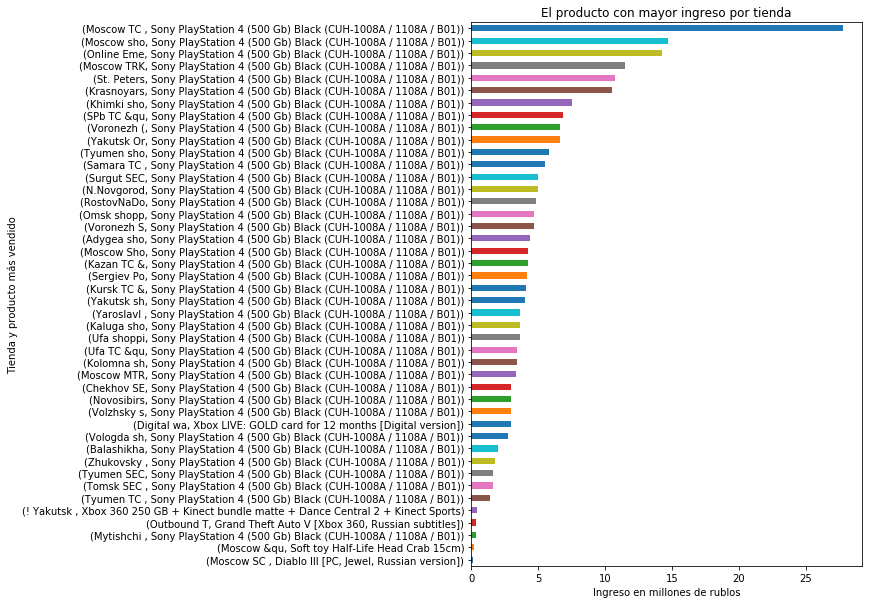

In [48]:
# Agrupamos la base por tienda y producto.
train_exploratory_por_tienda_articulo = train_exploratory.groupby(['shop_name','item_name']).sum()
# Dividimos el ingreso en millones 
train_exploratory_por_tienda_articulo['income_millones'] = train_exploratory_por_tienda_articulo['income'] / 1000000
# Agrupamos por tienda
ingreso_por_tienda_articulo = train_exploratory_por_tienda_articulo['income_millones'].groupby(level=0,group_keys=False)
# Graficamos el producto más vendido por tienda
ingreso_por_tienda_articulo.nlargest(1).sort_values(ascending = True).plot(figsize = (7, 10), 
                                                                           kind="barh",
                                                                          title ="El producto con mayor ingreso por tienda")
plt.xlabel("Ingreso en millones de rublos")
plt.ylabel("Tienda y producto más vendido")
plt.show()

### Ingreso total por categoría de productos

**Hallazgos:** La categoría de **games**es la más vendida, le sigue **cinema** y luego las **consolas**. El patrón es el mismo entre los tres años.

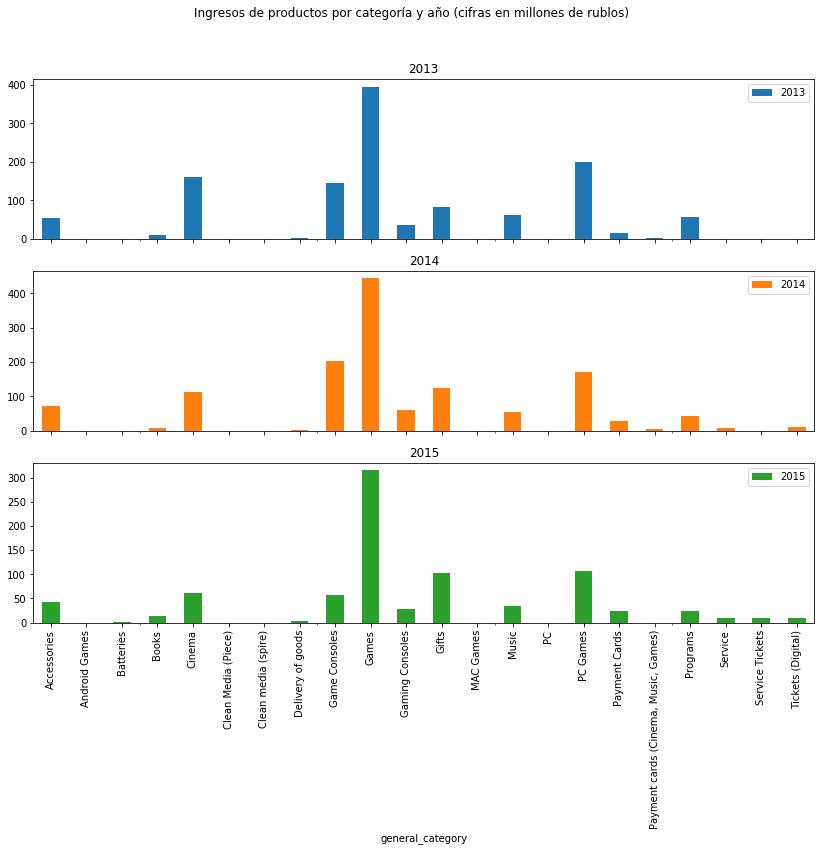

In [49]:
# Construimos una tabla de ingreso por año y categoría de producto
train_exploratory_por_categoria = train_exploratory.pivot_table(index='general_category', columns='ano', values='income',aggfunc='sum')
# Dividimos por milloines
train_exploratory_por_categoria_millones = train_exploratory_por_categoria / 1000000
# Graficamos
train_exploratory_por_categoria_millones.plot(kind="bar",subplots=True,figsize = (14, 10), 
                                     title="Ingresos de productos por categoría y año (cifras en millones de rublos)")
plt.show()

### Artículo que generó mayor ingreso por categoría

**Hallazgos:**
    
* El **Play Station 4** es el producto que más ingreso genera (200 millones de rublos).
* El video juego más vendido es Grand Theft Auto.

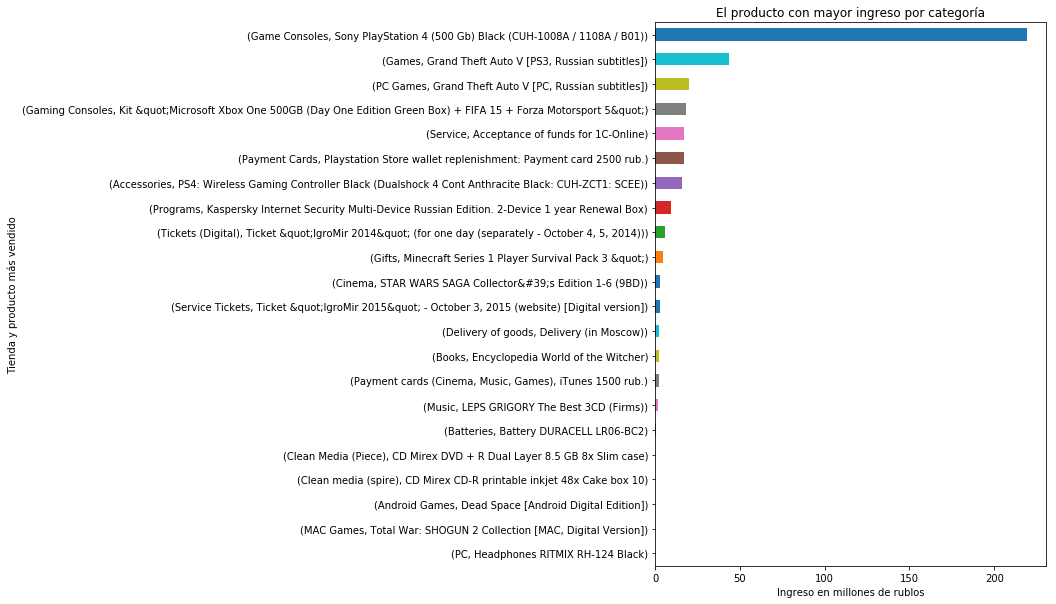

In [50]:
# Agrupamos la base por tienda y producto.
train_exploratory_por_categoria_articulo = train_exploratory.groupby(['general_category','item_name']).sum()
# Dividimos el ingreso en millones 
train_exploratory_por_categoria_articulo['income_millones'] = train_exploratory_por_categoria_articulo['income'] / 1000000
# Agrupamos por tienda
ingreso_por_categoria_articulo = train_exploratory_por_categoria_articulo['income_millones'].groupby(level=0,group_keys=False)
# Graficamos el producto más vendido por tienda
ingreso_por_categoria_articulo.nlargest(1).sort_values(ascending = True).plot(figsize = (7, 10), 
                                                                           kind="barh",
                                                                          title ="El producto con mayor ingreso por categoría")
plt.xlabel("Ingreso en millones de rublos")
plt.ylabel("Tienda y producto más vendido")
plt.show()

*Resumen:*

**El producto más vendido y que genera ingresos por más de 200 millones de rublos es:**

1. Game Consoles <--- Sony PlayStation 4 (500 Gb) Black

**El video juego más vendido:**

2. Games <--- Grand Theft Auto V PS3
3. PC Games <---  Grand Theft Auto V PC

**La segunda consola más vendida:**

4. Gaming Consoles <--- Microsoft Xbox One 500GB (Day One Edition Green Box) + FIFA 15 + Forza

**Servicio más vendido:**

5. Service <--- Acceptance of funds for 1C-Online

**La tarjeta de prepago más vendida:**

6. Payment Cards <--- Playstation Store wallet replenishment: Payment card 2500 rub. 

**El accesorio mejor vendido:**

7. Accessories <--- PS4: Wireless Gaming Controller Black (Dualshock 4 Cont Anthracite Black)

**Otros:**

8. Programs <--- Kaspersky Internet Security Multi-Device Russian Edition
9. Tickets (Digital) <---  IgroMir 2014
10. Gifts  <--- Minecraft Series 1 Player Survival
11. Cinema <--- STAR WARS SAGA Collectors Edition 1-6
12. Service Tickets <---  Ticket &quot para IgroMir 2015
13. Delivery of goods <--- Delivery (in Moscow)
14. Books <--- Encyclopedia World of the Witcher
15. Payment cards <---  iTunes 1500 rub.
16. Music <--- LEPS GRIGORY The Best 3CD
17. Batteries <--- Battery DURACELL LR06-BC2
18. Clean Media (Piece) <--- CD Mirex DVD + R Dual Layer 8.5 GB 8x Slim case
19. Clean media (spire) <--- CD Mirex CD-R printable inkjet 48x
20. Android Games <--- Dead Space
21. MAC Games <--- Total War: SHOGUN 2 Collection
22. PC <--- Headphones RITMIX RH-124 Black


### Ingreso promedio por categoría de productos

**Hallazgos:**

* Las **consolas** tienen el precio promedio más alto, casi de 25,000 rublos. 
* Los **tikets** son el segundo producto con mayor precio promedio y el que mayor dispersión tiene.

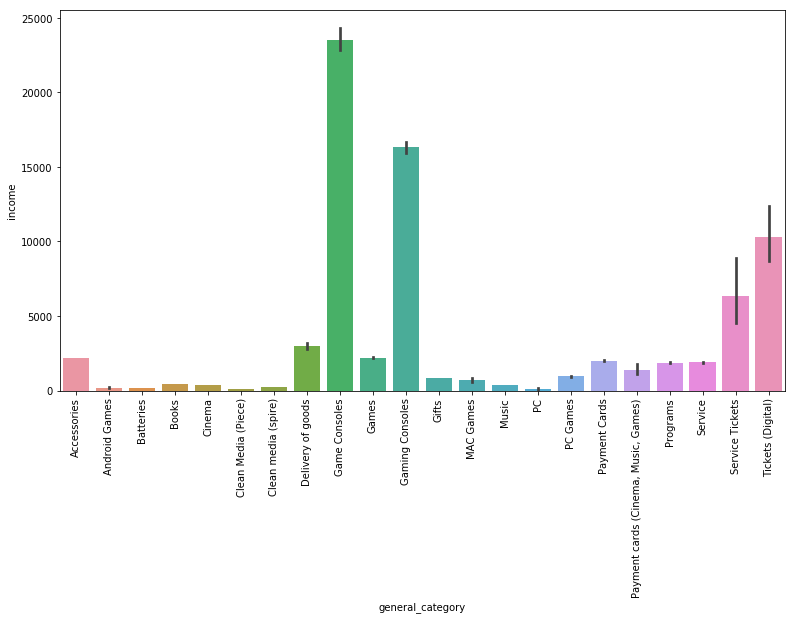

In [51]:
plt.figure(figsize = (13, 7.0))
fig = sns.barplot(x="general_category", y="income", data=train_exploratory)
plt.setp(fig.get_xticklabels(), rotation=90)
plt.show()


## Multivariado

### Relación precio cantidad por categoría de producto

**Hallazgos:**
    
* Se cumple la teoría económica de que a mayor precio menor cantidad en algunos años y categorías.
* Donde no se cumple se debe a valores extremos o falta de observaciones.

A continuación se grafica la relación precio cantidad por año.

* 2013 en azul
* 2014 en naranja
* 2015 en verde

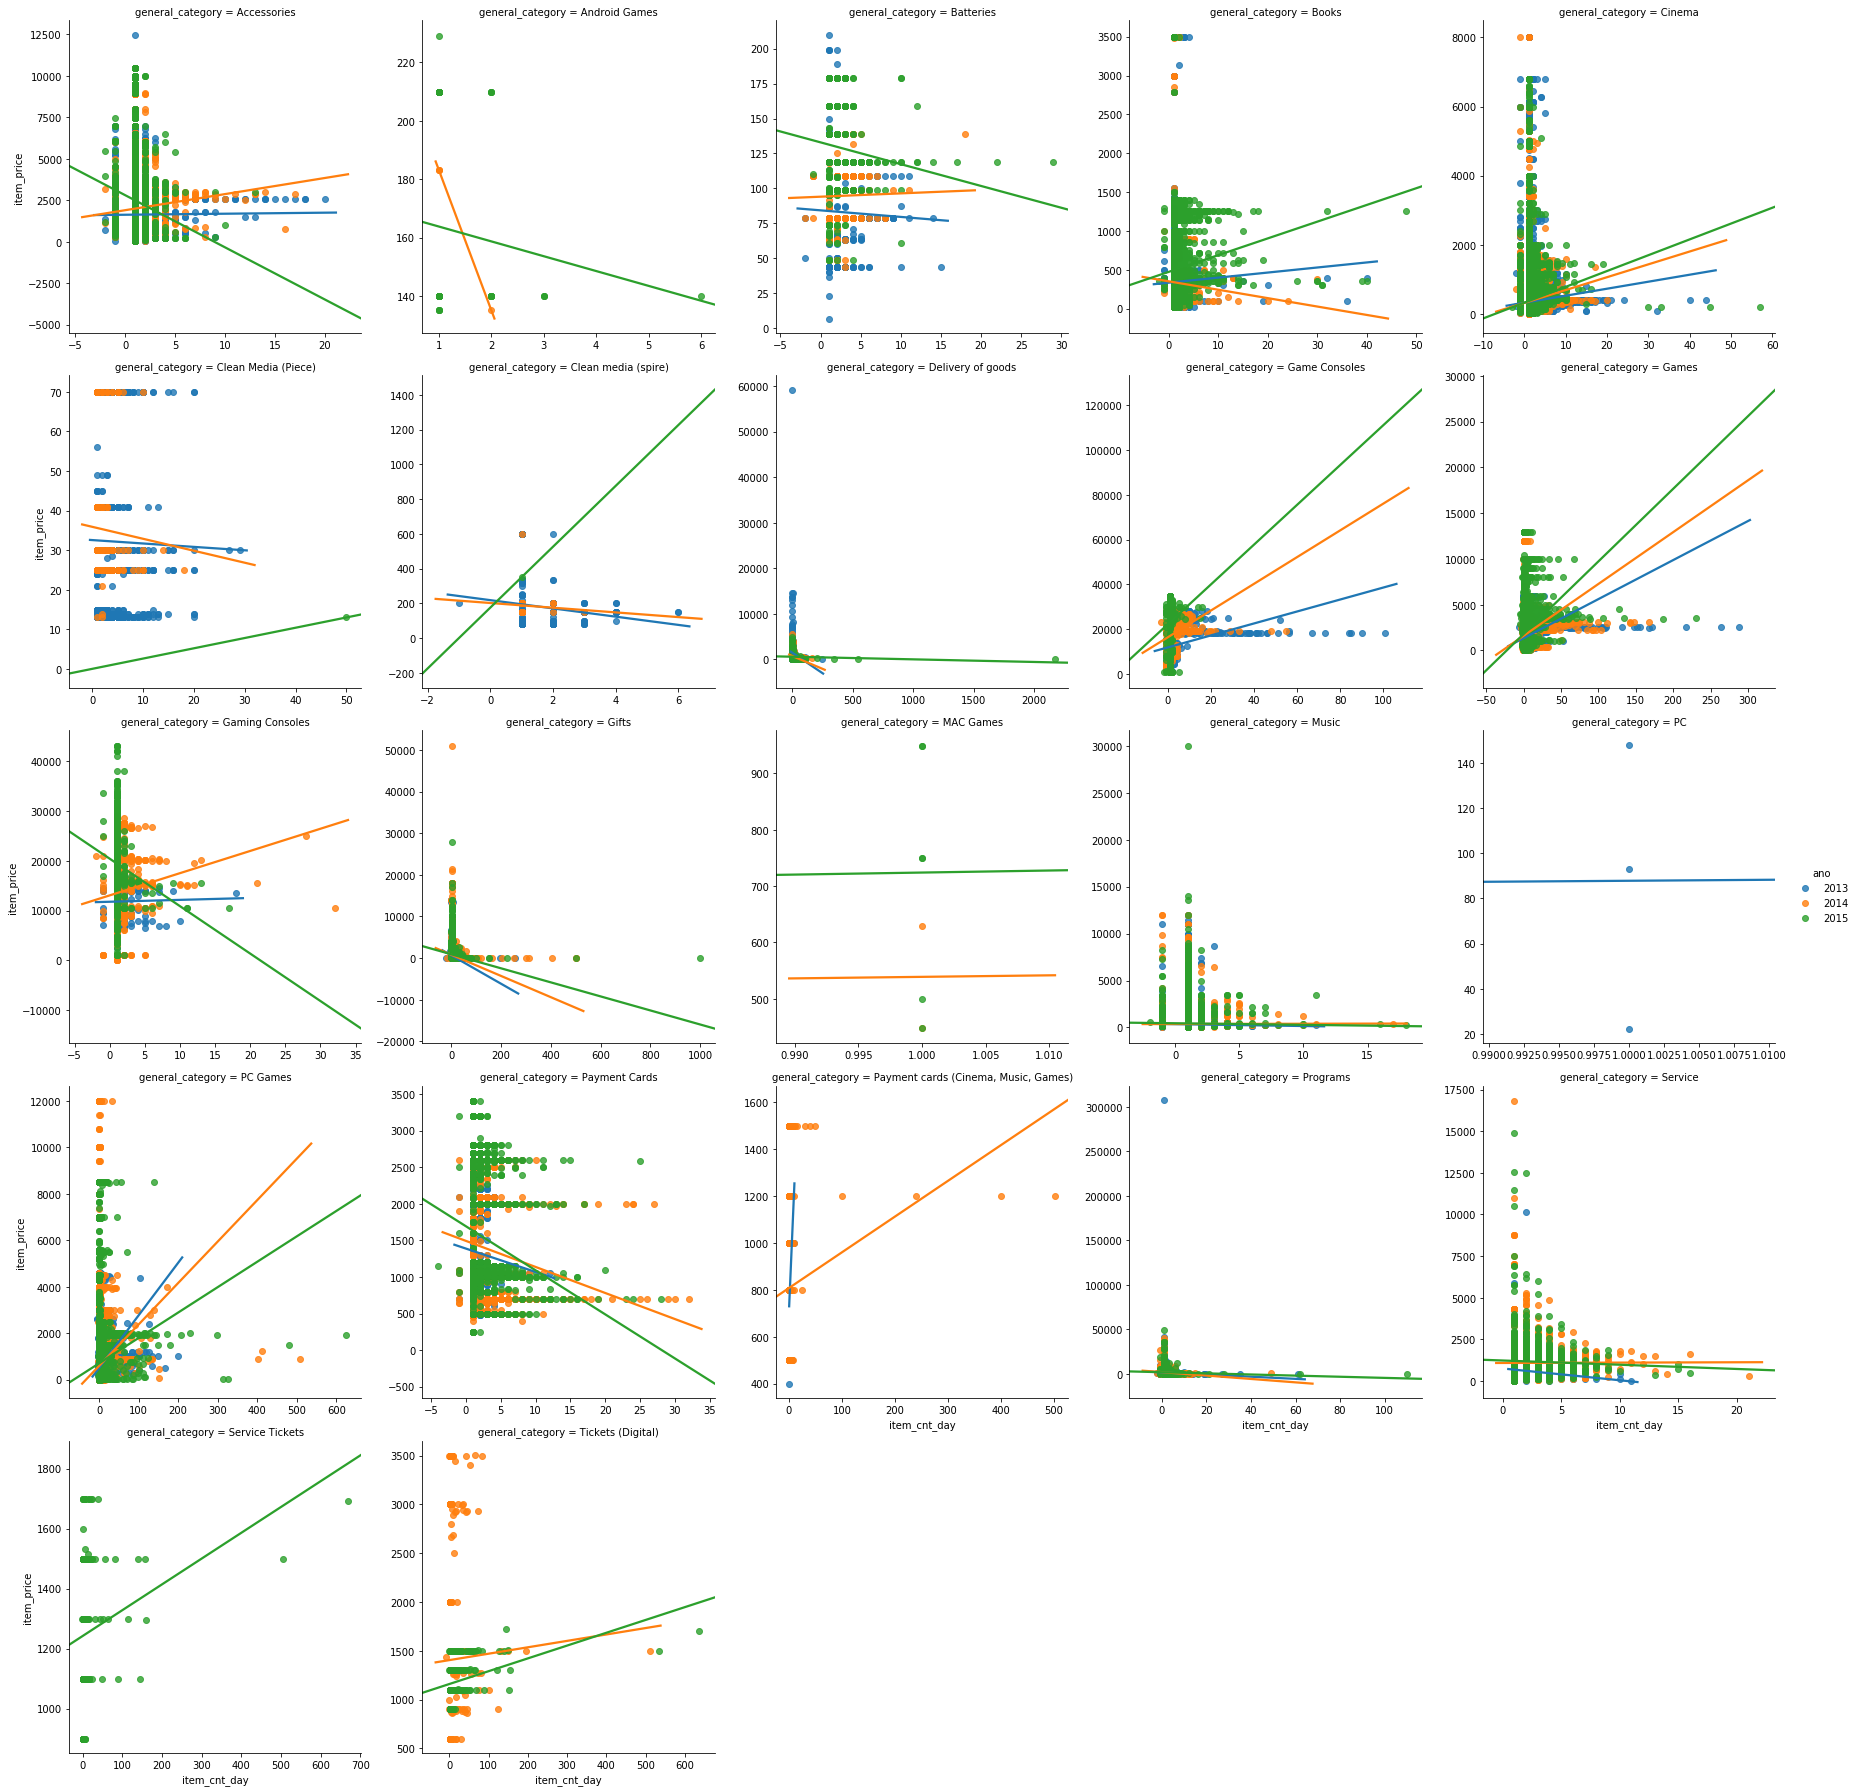

In [52]:
sns.lmplot(x='item_cnt_day',y='item_price', hue='ano', 
           col='general_category',col_wrap=5, sharex=False, sharey=False,
           ci=None,
           data = train_exploratory);

La relación negativa precio cantidad observada no se acerca tanto a la forma teórica. Las únicas figuras que muestran tener un comportamiento donde a menor precio mayor cantidad son:

* Accesories
* Android Games
* Batteries
* Books
* Clean media
* Delivery goods
* Gaming consoles 
* Music
* Payment Cards
* Programs
* Service

Es curioso que en algunos años el comportamiento negativo no es consistente.

### Auto correlación en las ventas

**Hallazgos:** 
* Los rezagos 1, 2, 6, 11 y 12 están correlacionados significativamente. Hace sentido con la teoría.
* Ventas y precios por mes también están altamente correlacionados.

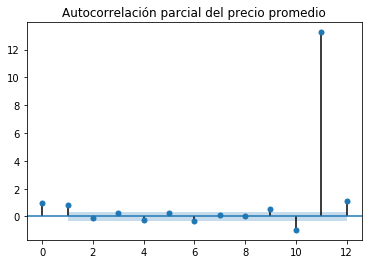

In [53]:
from statsmodels.graphics import tsaplots
#train_exploratory = train_exploratory.set_index("date")
x = train_exploratory[['item_price','item_cnt_day']].resample('M').mean()
tsaplots.plot_pacf(x['item_price'], lags=12)
plt.title("Autocorrelación parcial del precio promedio")
plt.show()
train_exploratory = train_exploratory.reset_index()

La gráfica de auto correlación parcial sobre la variable de ventas indica que hay una alta correlación con los siguientes rezagos:

* Mensual (lag 1)
* Bimestral (lag 2)
* Cuatrimestal (lag 3)
* Lag 10
* Lag 11
* Anual (lag 12)


Correlaciones entre las ventas mensuales

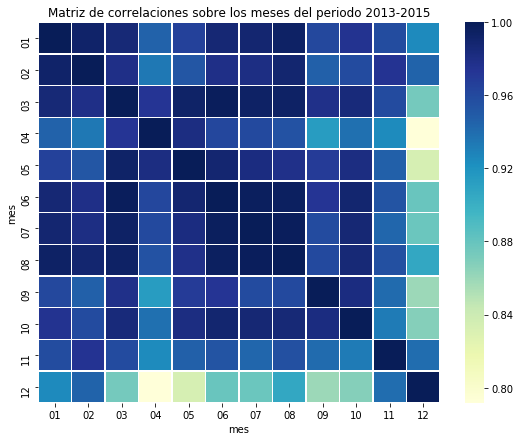

In [54]:
# Segmentación por año
datos_2013 = train_exploratory[train_exploratory['ano'] == '2013']
datos_2014 = train_exploratory[train_exploratory['ano'] == '2014']
datos_2015 = train_exploratory[train_exploratory['ano'] == '2015']
# Agregación por categoría y meses en las columnas
datos_agregados_2013 = datos_2013.pivot_table(index="general_category", columns="mes", values="income",aggfunc="sum")
datos_agregados_2014 = datos_2014.pivot_table(index="general_category", columns="mes", values="income",aggfunc="sum")
datos_agregados_2015 = datos_2015.pivot_table(index="general_category", columns="mes", values="income",aggfunc="sum")
datos_agregados_todos = train_exploratory.pivot_table(index="general_category", columns="mes", values="income",aggfunc="sum")
# Calculo de la matriz de correlaciones
corr_p_todos = datos_agregados_todos.corr(method="pearson")
corr_p_2013 = datos_agregados_2013.corr(method="pearson")
corr_p_2014 = datos_agregados_2014.corr(method="pearson")
corr_p_2015 = datos_agregados_2015.corr(method="pearson")
# Gráfica
plt.figure(figsize = (9, 7))
sns.heatmap(corr_p_todos, cmap="YlGnBu",linewidths=.5)
plt.title("Matriz de correlaciones sobre los meses del periodo 2013-2015")
plt.show()


La matriz de correlaciones sobre los meses del periodo 2013-2015 indican que existe alta correlación entre las ventas menusales, vemos que los valores son mayores a 0.8.

Notar que el mes de enero está altamente correlacionado con:

* Febrero, Marzo, Junio, Julio y Agosto.

Febrero con:

* Marzo
* Agosto
* Noviembre

Junio con:

* Julio
* Agosto

Diciembre con:

* Enero
* Febrero

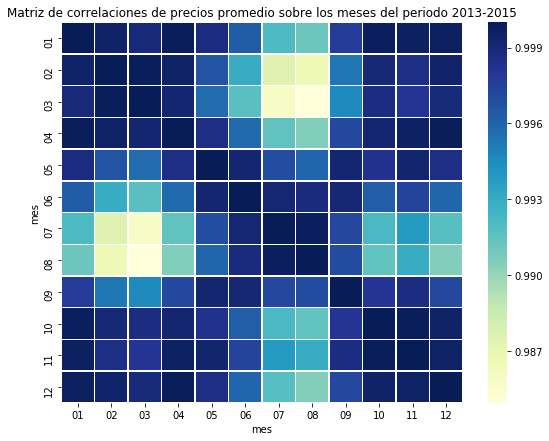

In [55]:
# Agregación por categoría y meses en las columnas
datos_agregados_2013_price = datos_2013.pivot_table(index="general_category", columns="mes", values="item_price",aggfunc="mean")
datos_agregados_2014_price = datos_2014.pivot_table(index="general_category", columns="mes", values="item_price",aggfunc="mean")
datos_agregados_2015_price = datos_2015.pivot_table(index="general_category", columns="mes", values="item_price",aggfunc="mean")
datos_agregados_todos_price = train_exploratory.pivot_table(index="general_category", columns="mes", values="item_price",aggfunc="mean")
# Calculo de la matriz de correlaciones
corr_p_todos_precios = datos_agregados_todos_price.corr(method="pearson")
corr_p_2013_precios = datos_agregados_2013_price.corr(method="pearson")
corr_p_2014_precios = datos_agregados_2014_price.corr(method="pearson")
corr_p_2015_precios = datos_agregados_2015_price.corr(method="pearson")
# Gráfica
plt.figure(figsize = (9, 7))
sns.heatmap(corr_p_todos_precios, cmap="YlGnBu",linewidths=.5)
plt.title("Matriz de correlaciones de precios promedio sobre los meses del periodo 2013-2015")
plt.show()

Vemos que los precios están altamente correlacionados, basta con ver la barra indicadora de la derecha donde la correlación mínima anda en el valor de 0.987.